# Data Set Information:
Exhaustive one year non-confidential data in the year 2015 to 2016 of firms is collected from the Auditor Office of India to build a predictor for classifying suspicious firms.

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

# Attribute information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records

PARA_A : Audit Parameter A in the report
PARA_B: Audit Parameter B in the report
TOTAL: Sum of Audit Parameters A and B
Sector_score: score of the organization in its respective sector
numbers: rating of the organization
Loss_score: loss value of the organization
Money_value: money value of the organization
History_score: historical score of the organization
District: type of district belong to
Risk: fraudulent or not

In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [2]:
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [5]:
#Standard libraries for data visualization:
import seaborn as sn
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

In [6]:
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [62]:
os.chdir('C:\\Users\\Pinak')

In [63]:
df = pd.read_csv('audit_firm_risk_factors.csv')

In [64]:
df

,Unnamed: 0,PARA_A,PARA_B,TOTAL,Sector_score,numbers,LOSS_SCORE,Money_Value,History_score,District,Risk
0,0,4.18,2.50,6.68,3.89,5.0,2,3.38,2,2,1
1,1,0.00,4.83,4.83,3.89,5.0,2,0.94,2,2,0
2,2,0.51,0.23,0.74,3.89,5.0,2,0.00,2,2,0
3,3,0.00,10.80,10.80,3.89,6.0,2,11.75,2,2,1
4,4,0.00,0.08,0.08,3.89,5.0,2,0.00,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
771,771,0.49,0.40,0.89,55.57,5.0,2,0.00,2,2,0
772,772,0.47,0.37,0.84,55.57,5.0,2,0.00,2,2,0
773,773,0.24,0.04,0.28,55.57,5.0,2,0.00,2,2,0
774,774,0.20,0.00,0.20,55.57,5.0,2,0.00,2,2,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     776 non-null    int64  
 1   PARA_A         776 non-null    float64
 2   PARA_B         776 non-null    float64
 3   TOTAL          776 non-null    float64
 4   Sector_score   776 non-null    float64
 5   numbers        776 non-null    float64
 6   LOSS_SCORE     776 non-null    int64  
 7   Money_Value    775 non-null    float64
 8   History_score  776 non-null    int64  
 9   District       776 non-null    int64  
 10  Risk           776 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 66.8 KB


In [66]:
df['Money_Value'].describe()

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64

In [67]:
# filling missing value with median
df = df.fillna({'Money_Value' : df['Money_Value'].median()})

In [68]:
#Recheck Null Values

df.isnull().sum()

Unnamed: 0       0
PARA_A           0
PARA_B           0
TOTAL            0
Sector_score     0
numbers          0
LOSS_SCORE       0
Money_Value      0
History_score    0
District         0
Risk             0
dtype: int64

In [69]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [70]:
df.describe()

,PARA_A,PARA_B,TOTAL,Sector_score,numbers,LOSS_SCORE,Money_Value,History_score,District,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,2.450194,10.799988,13.218481,20.184536,5.067655,2.061856,14.119528,2.167526,2.505155,0.626289
std,5.678870,50.083624,51.312829,24.319017,0.264449,0.375080,66.565444,0.679869,1.228678,0.484100
min,0.000000,0.000000,0.000000,1.850000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,0.210000,0.000000,0.537500,2.370000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,0.875000,0.405000,1.370000,3.890000,5.000000,2.000000,0.090000,2.000000,2.000000,1.000000
75%,2.480000,4.160000,7.707500,55.570000,5.000000,2.000000,5.587500,2.000000,2.000000,1.000000
max,85.000000,1264.630000,1268.910000,59.850000,9.000000,6.000000,935.030000,6.000000,6.000000,1.000000


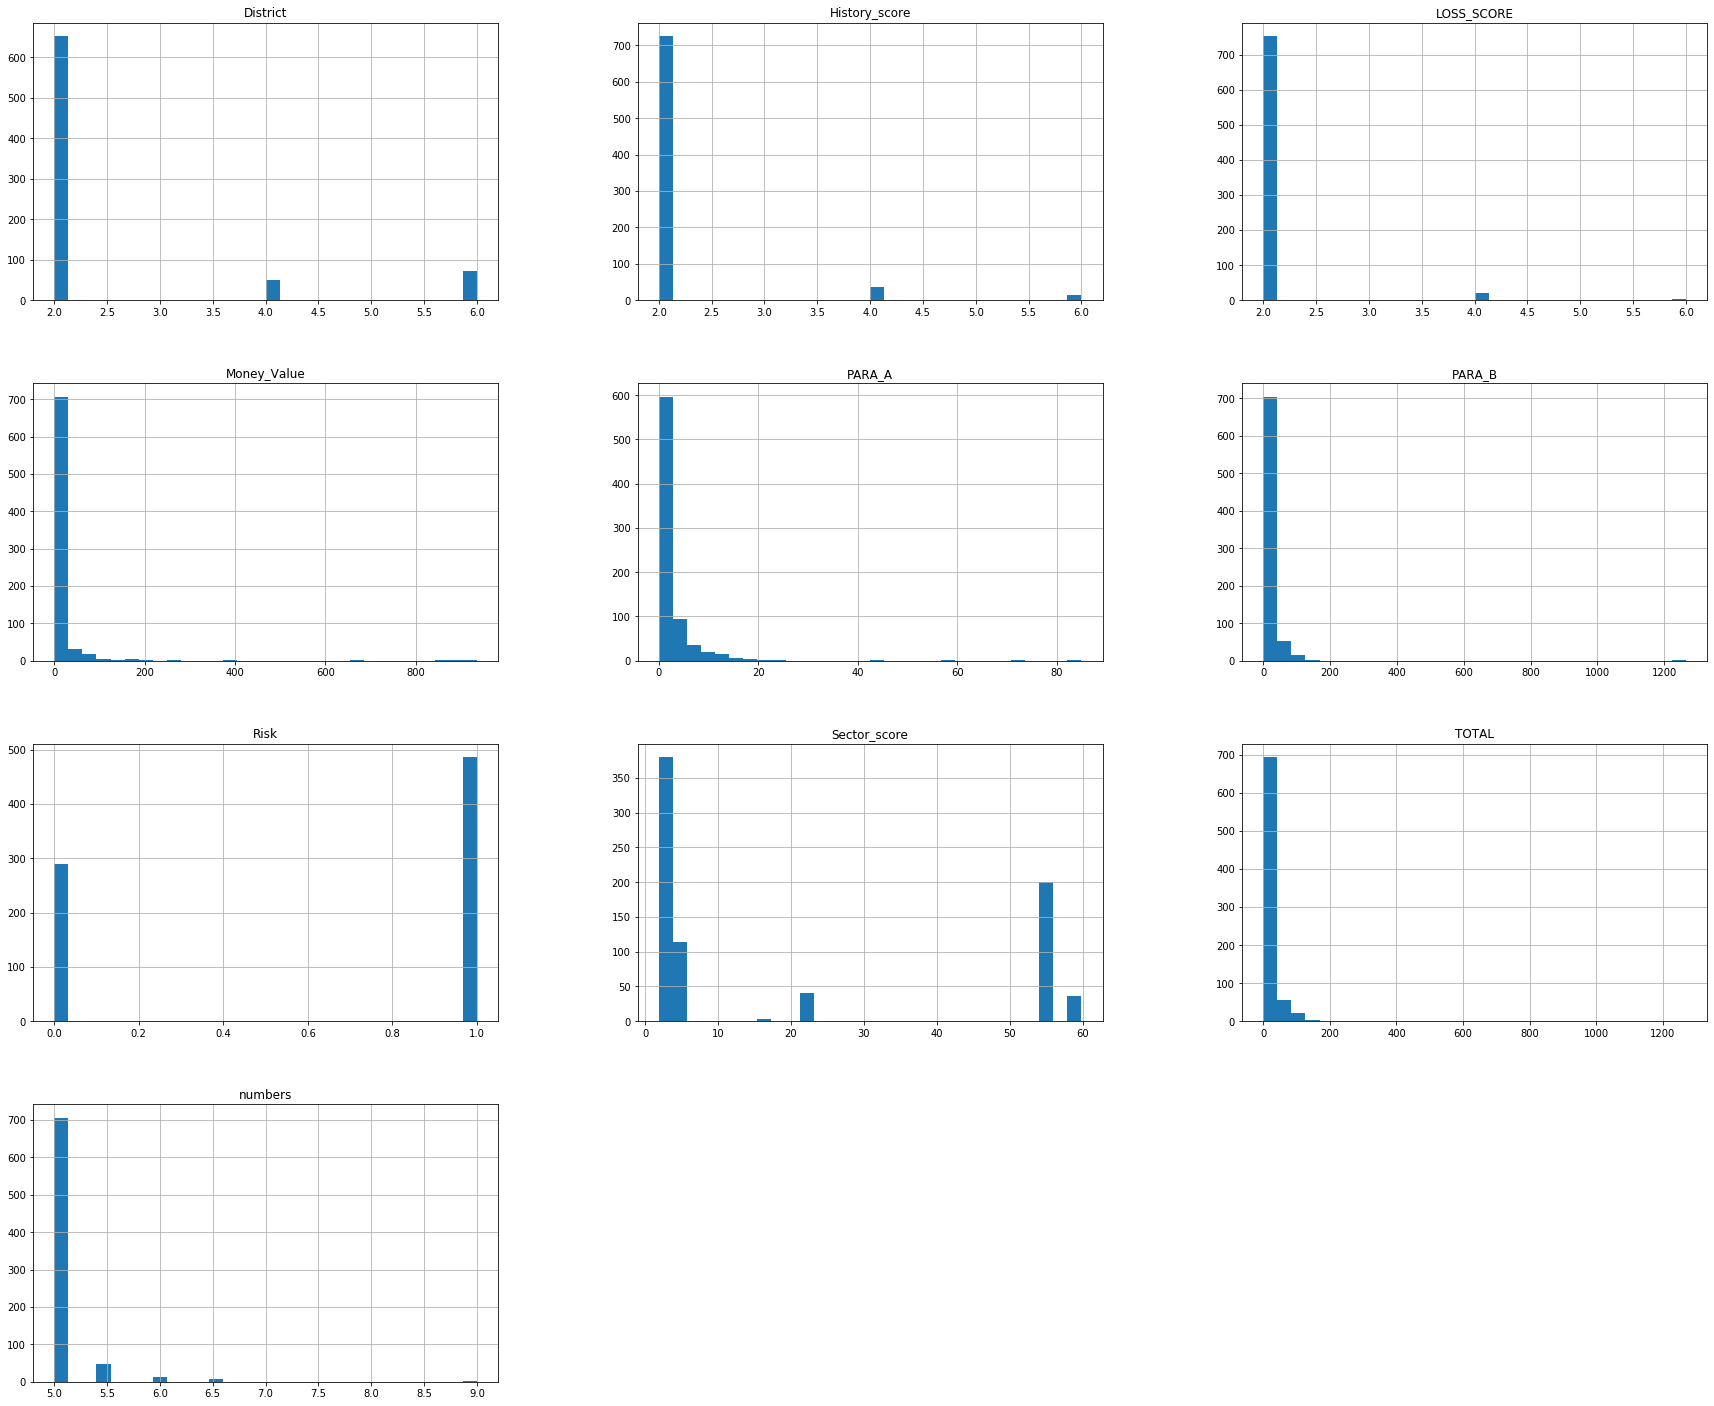

In [15]:
#Histogram of the Columns
df.hist(figsize = (30, 25), bins = 30, )
plt.show()

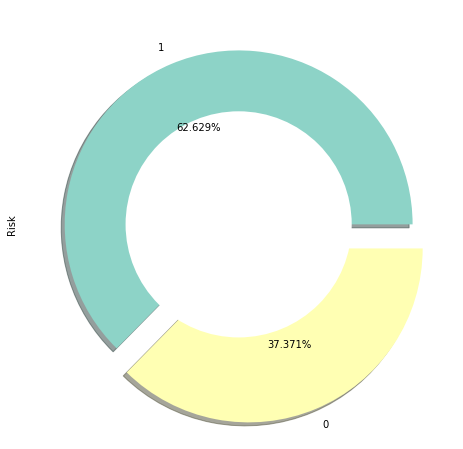

In [16]:
#Checking the distribution of Categorical Column "Class"

plt.figure(figsize = [8, 8], clear = True, )
df["Risk"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True , colors=sns.color_palette('Set3'),);
### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

In [17]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

calc_vif(df)

,variables,VIF
0,PARA_A,73.525043
1,PARA_B,4966.337175
2,TOTAL,5300.029710
3,Sector_score,1.977328
4,numbers,41.839272
5,LOSS_SCORE,30.277956
6,Money_Value,1.368971
7,History_score,13.352169
8,District,5.875820
9,Risk,3.682862


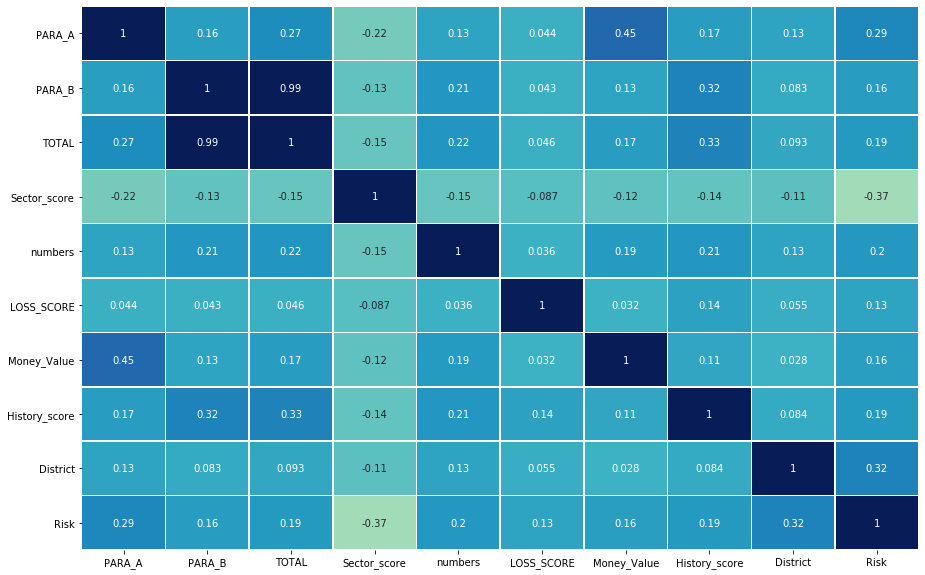

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [71]:
#Dropping "TOTAL" as highly correlated & its Sum of Audit Parameters A and B 
df.drop(['TOTAL'], axis=1,inplace=True)

In [73]:
calc_vif(df)

,variables,VIF
0,PARA_A,1.626415
1,PARA_B,1.183272
2,Sector_score,1.977259
3,numbers,41.791363
4,LOSS_SCORE,30.183699
5,Money_Value,1.320606
6,History_score,13.226000
7,District,5.798001
8,Risk,3.676484


In [ ]:
#the correlation is now fixed

In [74]:
df.Risk.value_counts()

1    486
0    290
Name: Risk, dtype: int64

In [ ]:
#Class imbalance present in the data . We will use SMOTE-ENN method to overcome this

In [75]:
X = df.drop(columns = 'Risk')
y = df.Risk

In [76]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X, y = smote_enn.fit_resample(X, y)

In [77]:
y.value_counts()


0    463
1    440
Name: Risk, dtype: int64

In [ ]:
#Now balanced

In [78]:
#scaling data to unit variance

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)
cols = X.columns
X = pd.DataFrame(scale.transform(X))
X.columns = cols

In [27]:
X.describe()


,PARA_A,TOTAL,Sector_score,numbers,LOSS_SCORE,Money_Value,History_score,District
count,9.110000e+02,9.110000e+02,9.110000e+02,9.110000e+02,9.110000e+02,9.110000e+02,9.110000e+02,9.110000e+02
mean,-5.368312e-17,-9.892684e-17,-1.135815e-16,1.342687e-15,7.548542e-16,-1.566012e-17,9.730599e-16,-9.409475e-16
std,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00
min,-3.964285e-01,-2.364241e-01,-8.571906e-01,-2.296319e-01,-1.444309e-01,-1.946685e-01,-2.217881e-01,-3.734659e-01
25%,-3.869982e-01,-2.303756e-01,-8.365619e-01,-2.296319e-01,-1.444309e-01,-1.946685e-01,-2.217881e-01,-3.734659e-01
50%,-2.813786e-01,-2.147675e-01,-7.762626e-01,-2.296319e-01,-1.444309e-01,-1.943438e-01,-2.217881e-01,-3.734659e-01
75%,-3.430422e-02,-1.273002e-01,1.273913e+00,-2.296319e-01,-1.444309e-01,-1.555480e-01,-2.217881e-01,-3.734659e-01
max,1.563511e+01,2.644341e+01,1.443703e+00,1.617779e+01,1.181707e+01,1.498325e+01,6.295921e+00,3.116046e+00


In [79]:
#Identify response variable:
    
response = df['Risk']
df = df.drop(columns="Risk")

In [80]:
#Splitting Dataset to train & test 

X_train, X_test, y_train, y_test = train_test_split(df,
response,stratify=response, test_size = 0.2,)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (620, 8)
Number transactions y_train dataset:  (620,)
Number transactions X_test dataset:  (156, 8)
Number transactions y_test dataset:  (156,)


# Model Selection

In [ ]:
#Identify the optimal number of trees for Random Forest Model

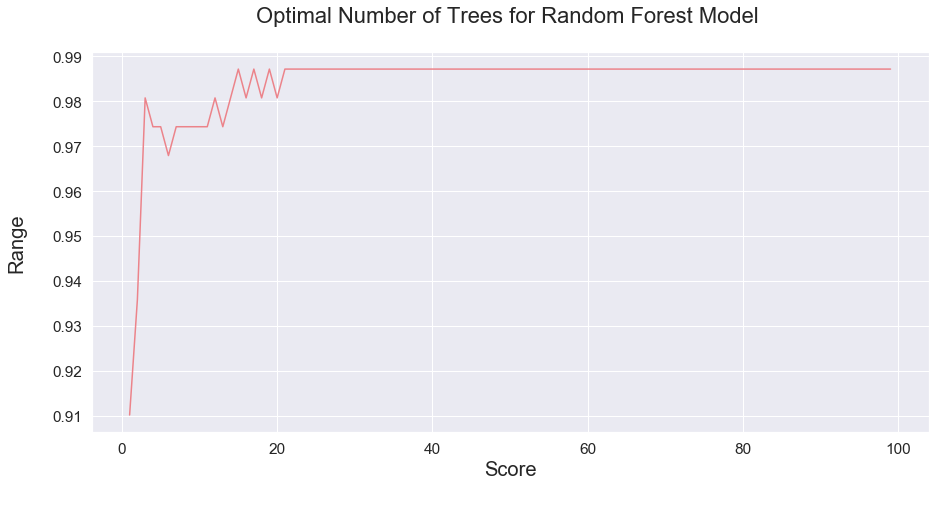

In [81]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
#Identify the optimal number of K neighbors for KNN Model

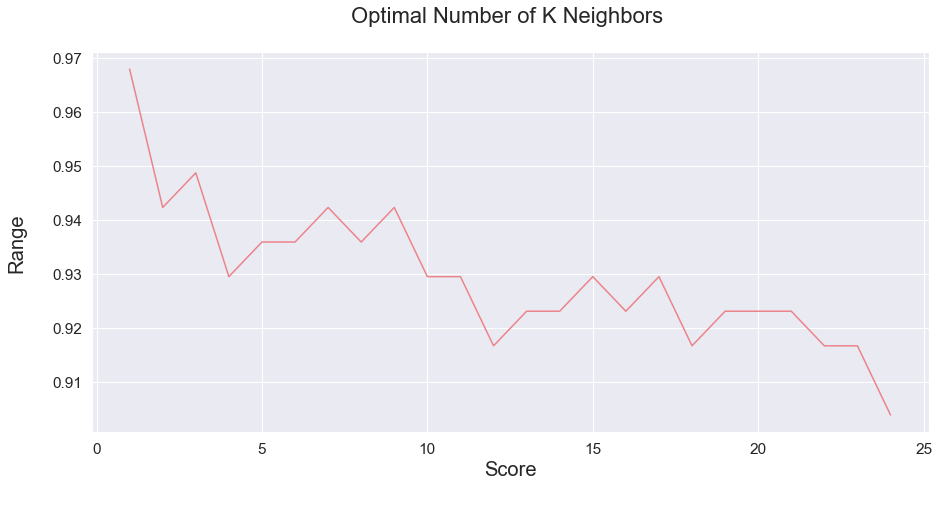

In [82]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [83]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.935897   0.958333  0.938776  0.948454  0.942623


C:\Users\Pinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [84]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
1        Decision Tree  0.987179   0.980000  1.000000  0.989899  0.995935
0  Logistic Regression  0.935897   0.958333  0.938776  0.948454  0.942623


In [85]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 22
                                    , 
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix 
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
2        Random Forest  0.987179   0.989796  0.989796  0.989796  0.989796
0        Decision Tree  0.987179   0.980000  1.000000  0.989899  0.995935
1  Logistic Regression  0.935897   0.958333  0.938776  0.948454  0.942623


In [86]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 1, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0         Random Forest  0.987179   0.989796  0.989796  0.989796  0.989796
1         Decision Tree  0.987179   0.980000  1.000000  0.989899  0.995935
3  K-Nearest Neighbours  0.967949   0.969697  0.979592  0.974619  0.977597
2   Logistic Regression  0.935897   0.958333  0.938776  0.948454  0.942623


# We will selelct Model Decision Tree due to higher accuracy

In [87]:
# Fitting Decision Tree to the Training set:
m1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
m1.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = m1.predict(X_test)

In [88]:
m1.score(X_test,y_test)

0.9871794871794872

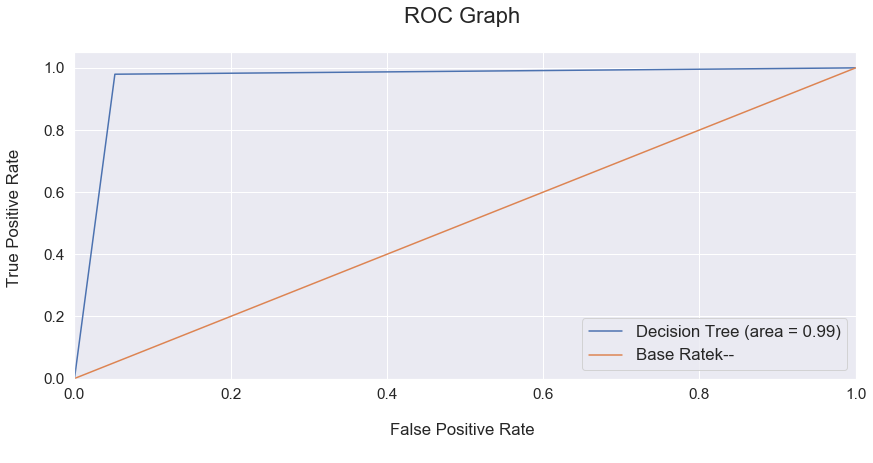

In [89]:
# Evaluate the model using ROC Graph: It’s good to re-evaluate the model using ROC Graph. 
#ROC Graph shows us the capability of a model to distinguish between the classes based on the AUC Mean score. 
#The orange line represents the ROC curve of a random classifier while a good classifier tries to remain as far- 
#-away from that line as possible. As shown in the graph below, the fine-tuned Random Forest model showcased a-
#-higher AUC score.

m1.fit(X_train, y_train) 
probs = m1.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Decision Tree ROC
plt.plot(rf_fpr, rf_tpr, 
label='Decision Tree (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


In [90]:
# Predict the Test set results
y_pred = m1.predict(X_test)
#probability score
y_pred_probs = m1.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

# Predict Feature Importance: Decision Tree allows us to determine the key features that have significance in predicting the target attribute (“Risk” in this project).

In [91]:
# Analyzing Coefficients
feature_importances = pd.DataFrame(m1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances


,importance
PARA_A,0.522299
PARA_B,0.159849
District,0.156234
Money_Value,0.091363
Sector_score,0.031486
numbers,0.023177
LOSS_SCORE,0.015592
History_score,0.000000


[[56  2]
 [ 0 98]]
Test Data Accuracy: 0.9872


<Figure size 2016x1440 with 0 Axes>

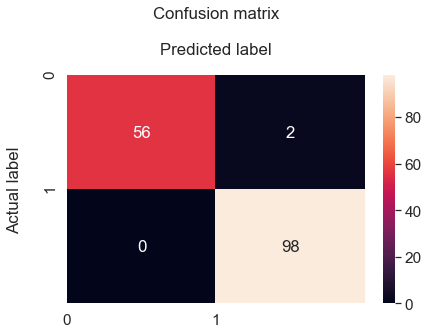

In [92]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),
rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# We can classify the companies into two categories Risky and Non-Risky with very good accuracy using Decision Tree model